In [240]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import h5py
# import cvxpy as cvx
import os

from util import *
# from data_loader import * 
# from module_deconv import *
# from module_exp import *
from sc_deconv import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import scanpy.api as sc
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import pairwise_distances

sc.settings.verbosity = 3                # increase for more output
sc.settings.set_dpi(100)                  # low pixel number yields small inline figures
sc.logging.print_version_and_date()

/home/vasilis/anaconda2/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Running Scanpy version 0.2.6 on 2018-02-01 17:45.


In [18]:
import seaborn as sns

[ 2.4   2.15  1.2  -0.7  -5.  ]


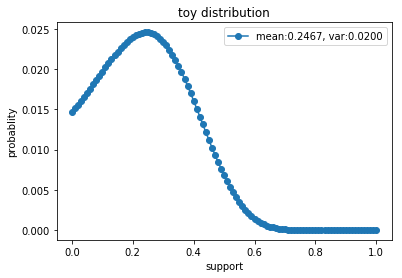

In [2]:
## creating a toy 1d distribution instance
np.random.seed(42)
p,x=toy_dist(vis=1,opt='1d_Q')

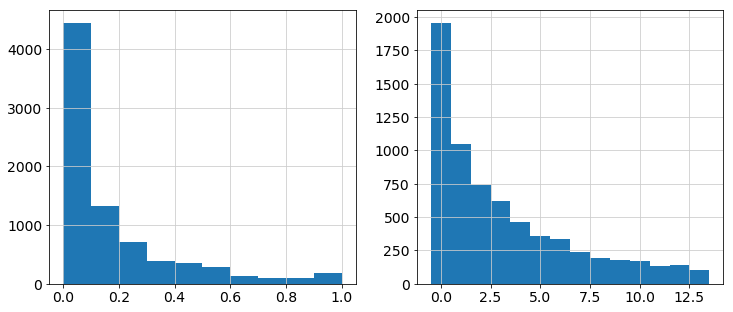

In [86]:
## generate the simulated read count data
N_c=8000
N_r=38
X,Y,data_info=data_gen_1d(p_hat,dd_info['x'],N_c,N_r,noise='poi',vis=1)

### distribution estimation

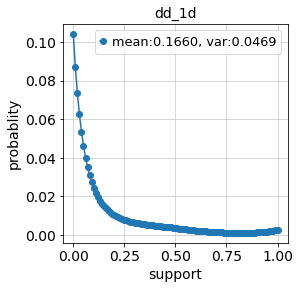

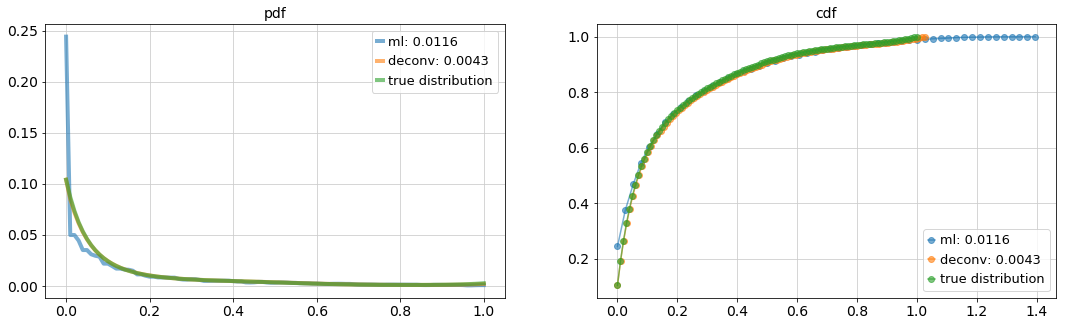

In [87]:
## distribution estimation
# input: Y  
# summary function: Y --> Y_pdf, Y_supp
# specify the scale of x and N_r 

p_hat,dd_info=dd_1d(Y,noise='poi',vis=1,N_r=None)
p_hat_ml,ml_info=ml_1d(Y)
_=plot_result_1d(p_hat,p_hat,p_hat_ml,dd_info,ml_info,data_info)

## 8k PBMC @ 100K rpc

In [12]:
filename_data = '/home/vasilis/LinSEP/filtered_gene_bc_matrices/GRCh38/matrix.mtx'
filename_genes = '/home/vasilis/LinSEP/filtered_gene_bc_matrices/GRCh38/genes.tsv'
filename_barcodes = '/home/vasilis/LinSEP/filtered_gene_bc_matrices/GRCh38/barcodes.tsv'

In [14]:
%%time
adata = sc.read(filename_data, cache=True).transpose()
adata.var_names = np.genfromtxt(filename_genes, dtype=str)[:, 1]
adata.smp_names = np.genfromtxt(filename_barcodes, dtype=str)
sc.logging.print_memory_usage()

reading file /home/vasilis/LinSEP/filtered_gene_bc_matrices/GRCh38/matrix.mtx
... did not find row_names or col_names
... writing an h5 cache file to speedup reading next time
writing ./write/data/home/vasilis/LinSEP/filtered_gene_bc_matrices/GRCh38/matrix.h5
Memory usage: current 0.22 GB, difference +0.22 GB
CPU times: user 41.1 s, sys: 6.05 s, total: 47.2 s
Wall time: 48.9 s


CST3
Average counts per cell = 7.001789762558167


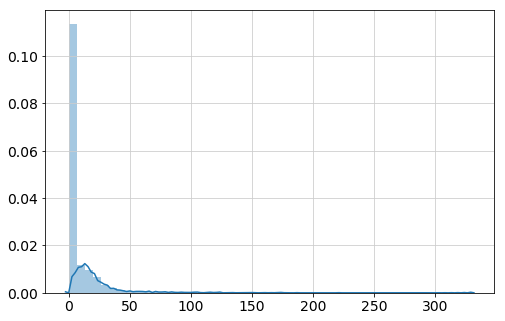

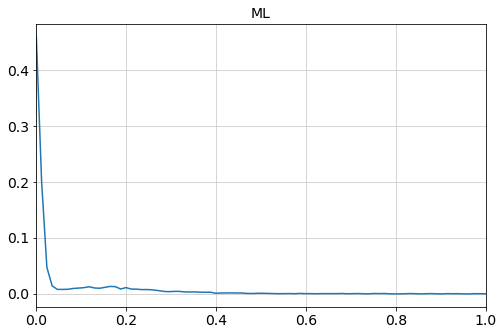

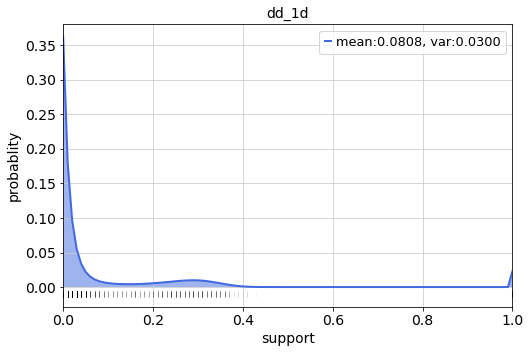

estimated Nr: 85.20000000000073


In [245]:
gene='CST3'
Y=np.array(adata[:,gene].X,dtype=int)
print(gene)
print("Average counts per cell =",np.sum(Y)/len(Y))
plt.figure(figsize=[8,5])
sns.distplot(Y)
plt.show()
plt.figure(figsize=[8,5])
p_hat_ml,ml_info=ml_1d(Y)
plt.plot(ml_info['x'],p_hat_ml)
plt.xlim([0,1])
plt.title('ML')

p_hat,dd_info=dd_1d(Y,noise='poi',vis=1,N_r=None)
print("estimated Nr:",dd_info['N_r'])

FTL
Average counts per cell = 27.60064431452094


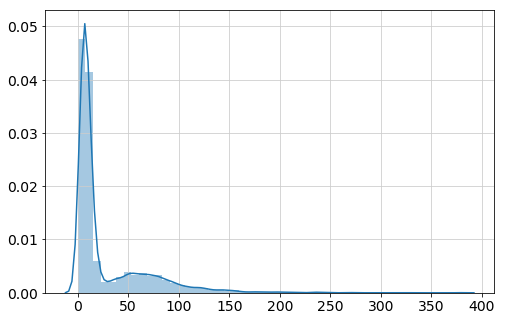

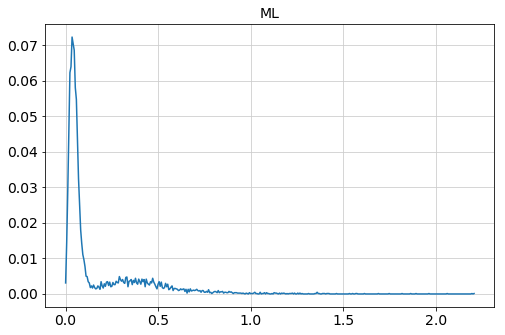

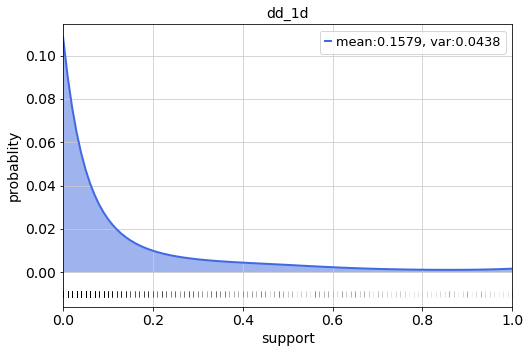

estimated Nr: 172.20000000000073


In [242]:
gene='FTL'
Y=np.array(adata[:,gene].X,dtype=int)
print(gene)
print("Average counts per cell =",np.sum(Y)/len(Y))
plt.figure(figsize=[8,5])
sns.distplot(Y)
plt.show()
plt.figure(figsize=[8,5])
p_hat_ml,ml_info=ml_1d(Y)
plt.plot(ml_info['x'],p_hat_ml)
plt.title('ML')

p_hat,dd_info=dd_1d(Y,noise='poi',vis=1,N_r=None)
print("estimated Nr:",dd_info['N_r'])
# plt.figure(figsize=[8,5])
# X=np.random.choice(dd_info['x'], 2000, p=p_hat)
# plt.plot(dd_info['x'],p_hat,marker='.',lw=2,markersize=0,color="royalblue")
# # plt.fill_between(x, p, facecolor='royalblue', alpha=0.5)
# # plt.xlim([0,1])
# # plt.ylim([0,1.05*np.max(p)])
# plt.plot(X, [-0.01]*len(X), '|', color='k',alpha=0.05)
# plt.show()

In [203]:
genes=["S100A9","S100A8","S100A4","LGALS2","FCN1","CD14","GZMB","IGFBP7","CD79A","CD3E","LYZ","MS4A1",
       "GNLY","FGFBP2","FCER1G","LDHB","IL7R","LST1","PF4","NKG7","CST3","CCR7"]

S100A9
Average counts per cell = 16.659587161436583


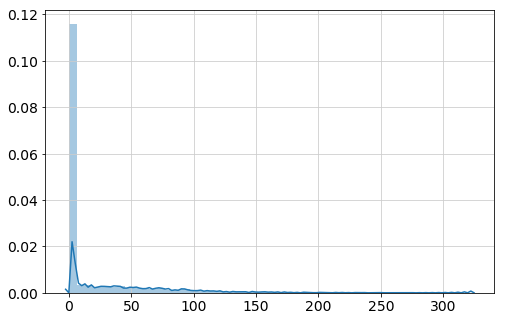

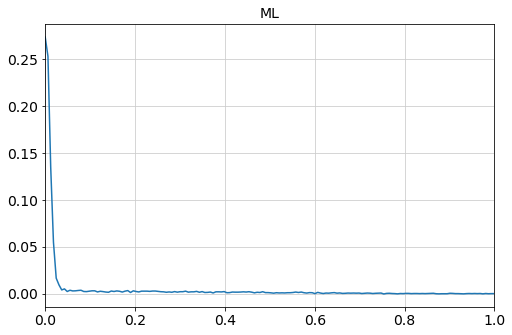

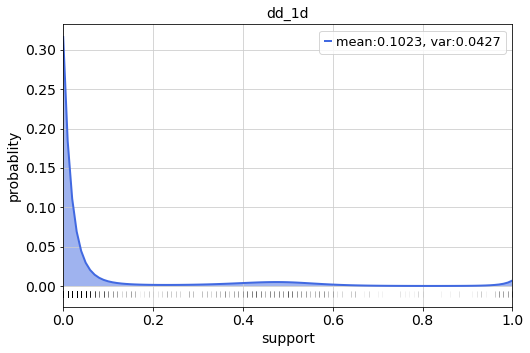

estimated Nr: 163.20000000000073
-------------------------------------------------------------------------
S100A8
Average counts per cell = 13.68273475718888


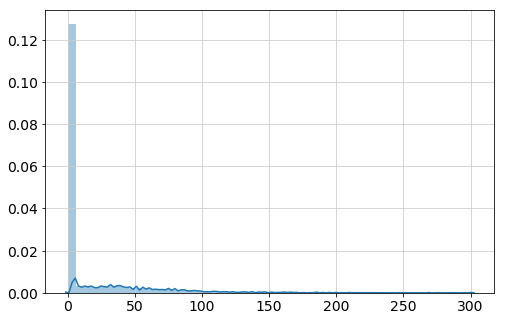

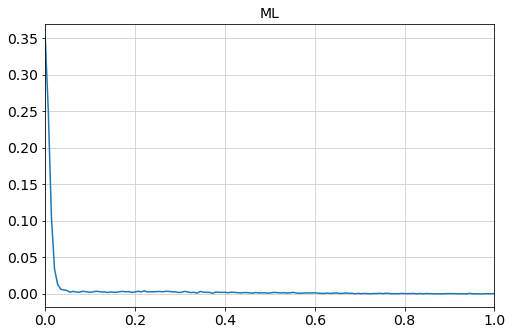

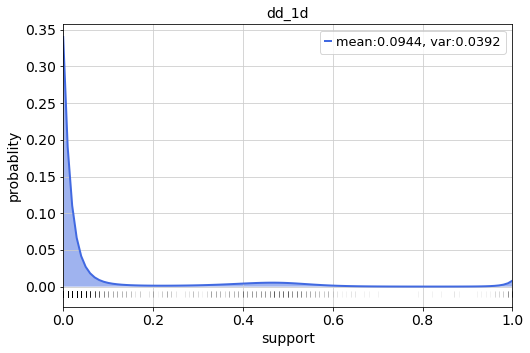

estimated Nr: 145.0
-------------------------------------------------------------------------
S100A4
Average counts per cell = 10.855745137811716


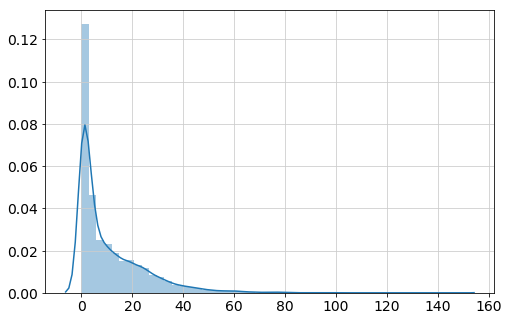

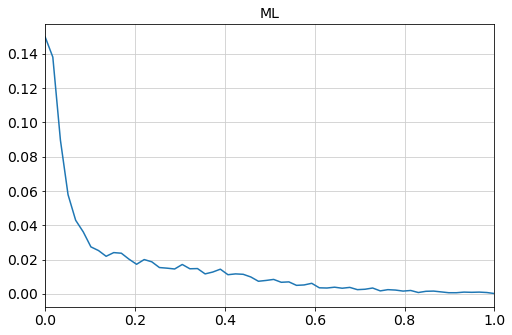

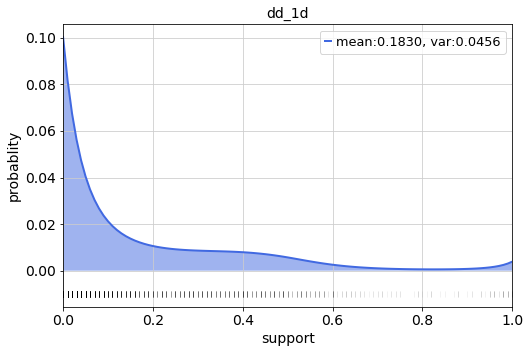

estimated Nr: 59.0
-------------------------------------------------------------------------
LGALS2
Average counts per cell = 1.2554587758024103


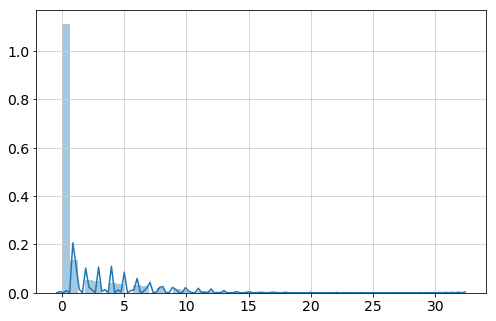

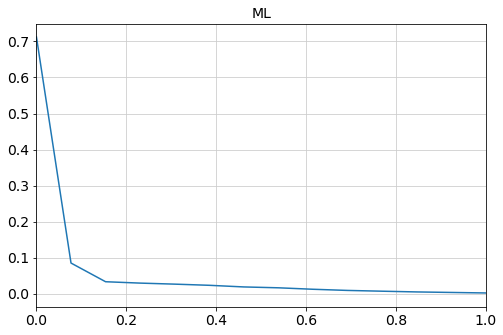

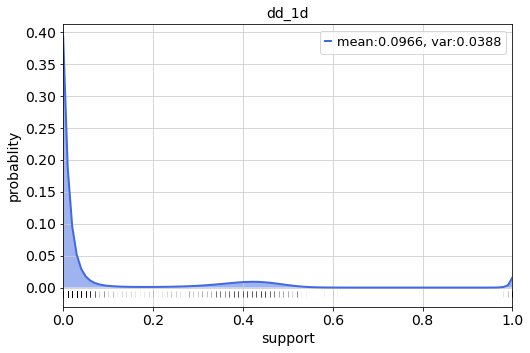

estimated Nr: 13.0
-------------------------------------------------------------------------
FCN1
Average counts per cell = 2.1746808256771266


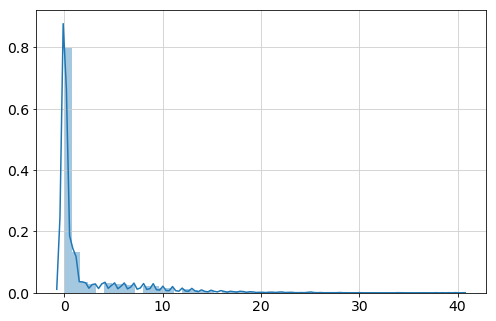

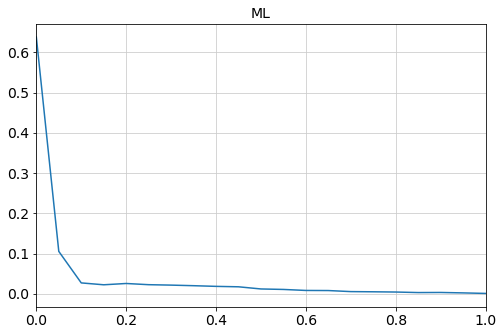

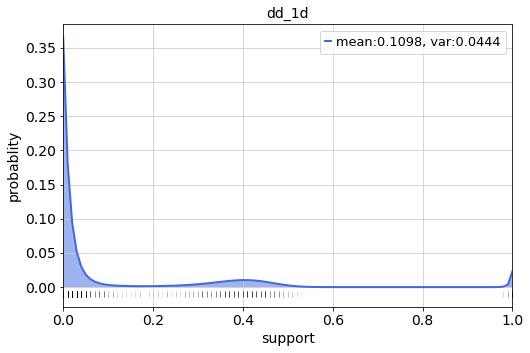

estimated Nr: 20.0
-------------------------------------------------------------------------
CD14
Average counts per cell = 0.6564849063357595


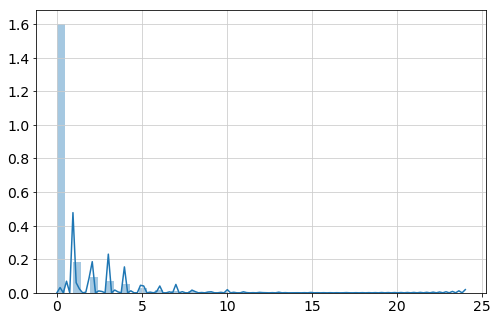

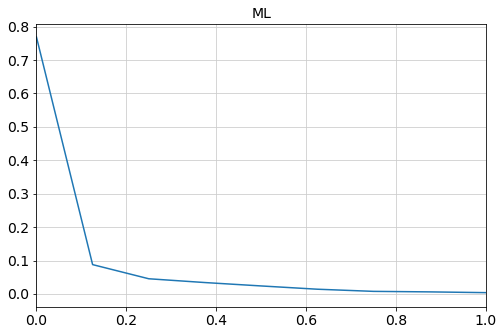

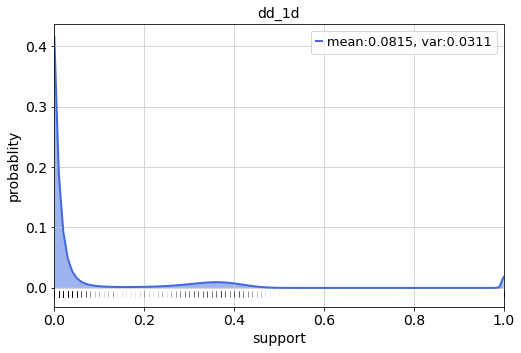

estimated Nr: 8.0
-------------------------------------------------------------------------
GZMB
Average counts per cell = 0.46116215248777


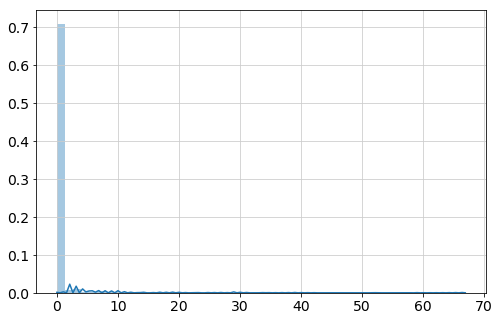

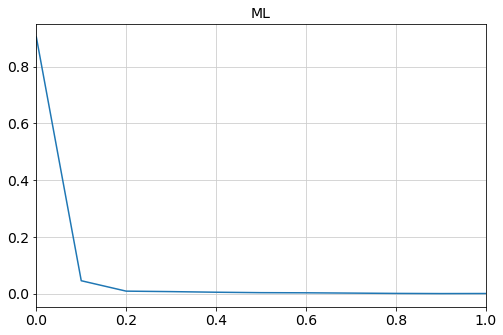

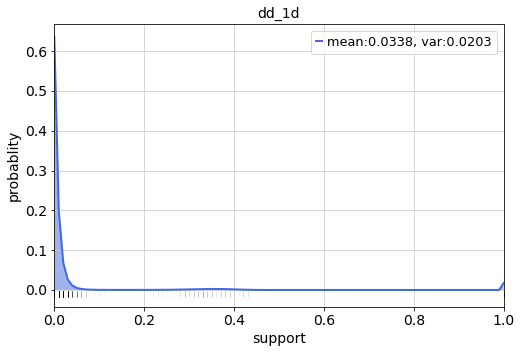

estimated Nr: 10.0
-------------------------------------------------------------------------
IGFBP7
Average counts per cell = 0.09760171817205585


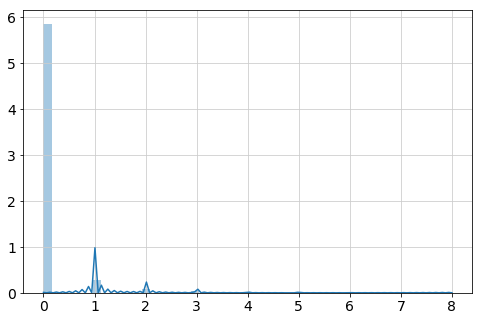

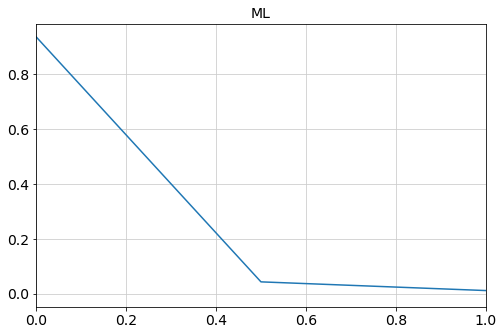

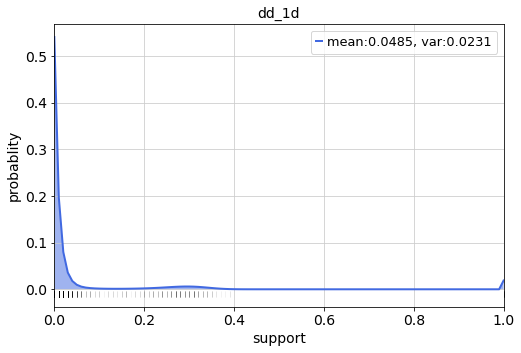

estimated Nr: 2.0
-------------------------------------------------------------------------
CD79A
Average counts per cell = 1.003937477627968


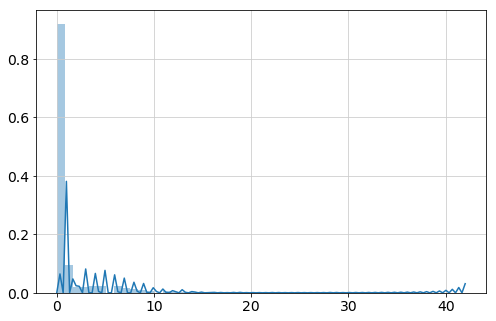

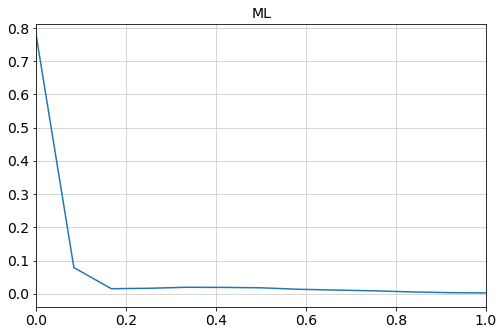

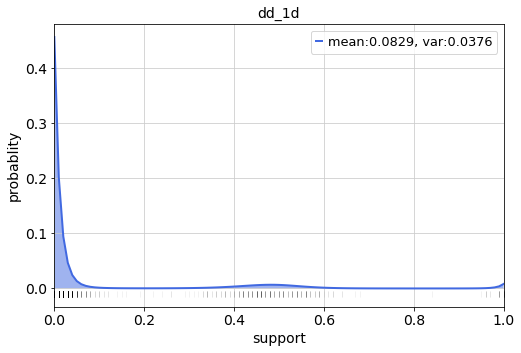

estimated Nr: 12.0
-------------------------------------------------------------------------
CD3E
Average counts per cell = 1.6037465696217634


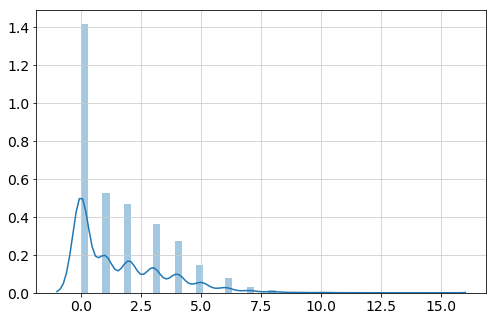

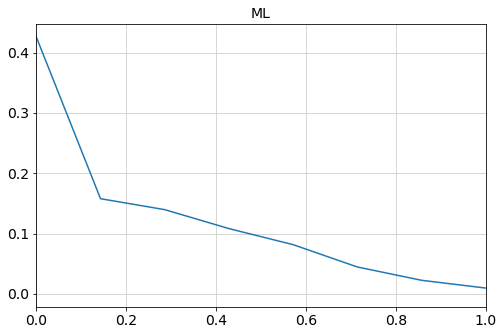

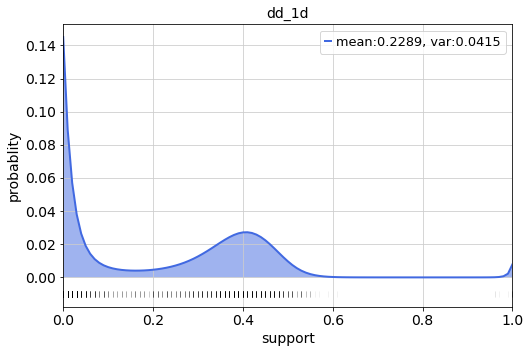

estimated Nr: 7.0
-------------------------------------------------------------------------
LYZ
Average counts per cell = 17.511156186612578


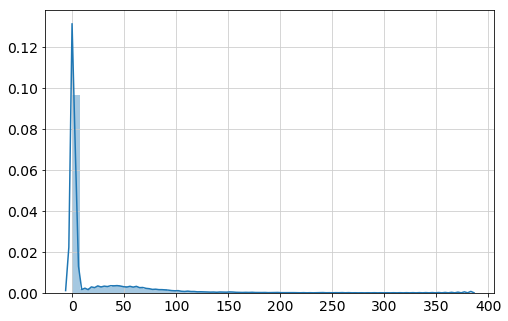

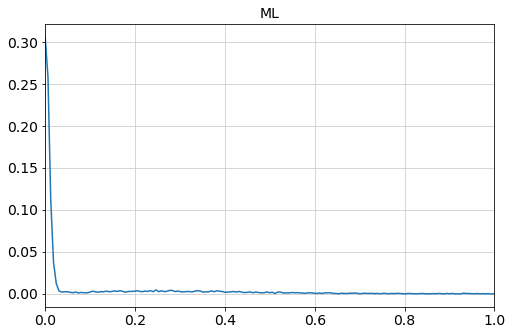

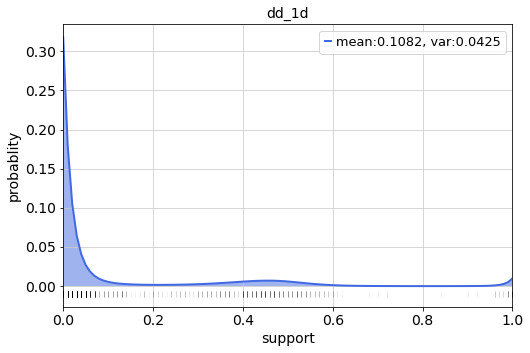

estimated Nr: 162.20000000000073
-------------------------------------------------------------------------
MS4A1
Average counts per cell = 0.65481446128147


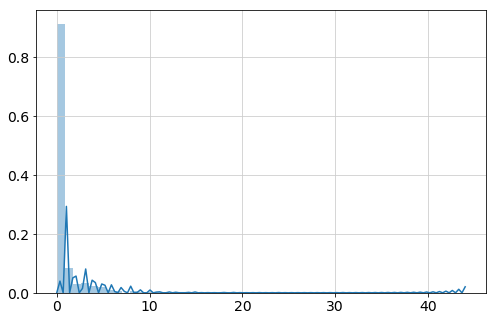

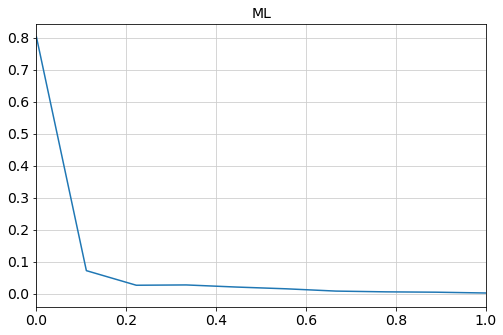

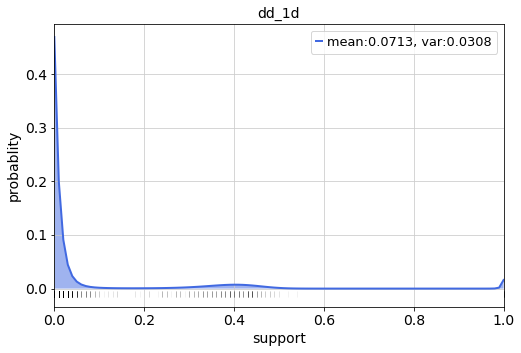

estimated Nr: 9.0
-------------------------------------------------------------------------
GNLY
Average counts per cell = 1.9725569741081017


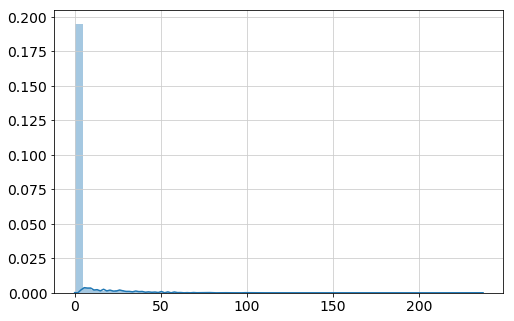

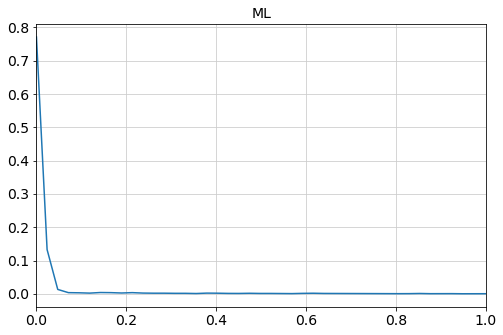

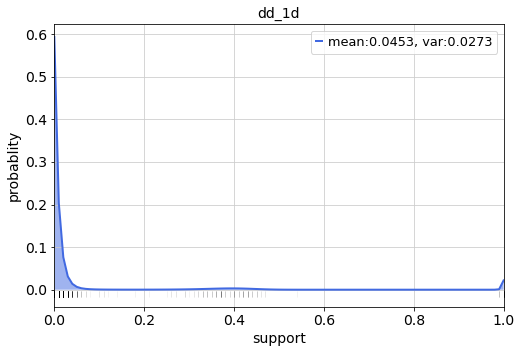

estimated Nr: 42.20000000000073
-------------------------------------------------------------------------
FGFBP2
Average counts per cell = 0.2930437895239232


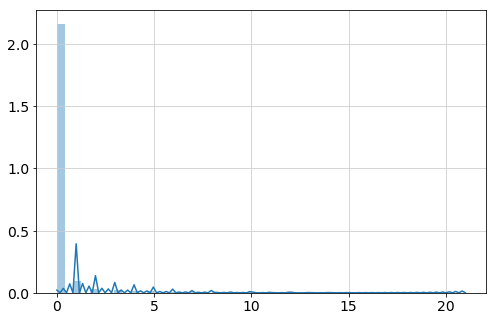

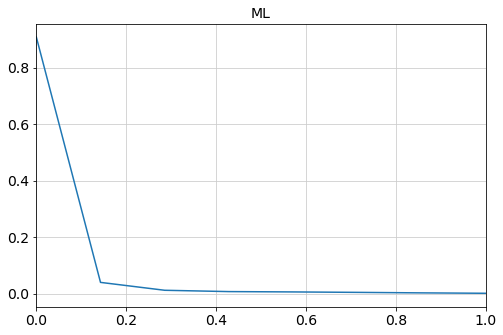

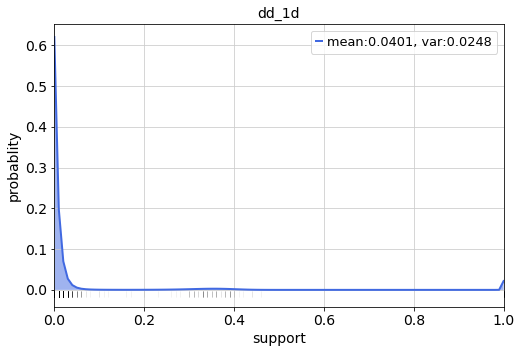

estimated Nr: 7.0
-------------------------------------------------------------------------
FCER1G
Average counts per cell = 2.8796086385872806


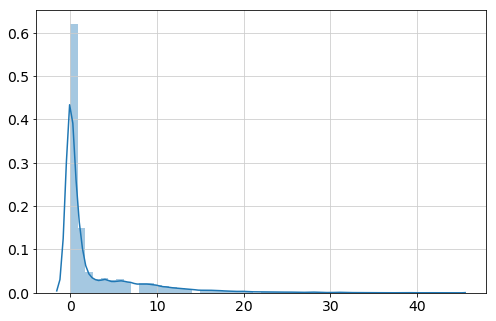

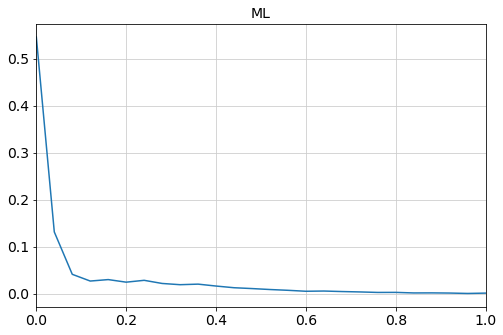

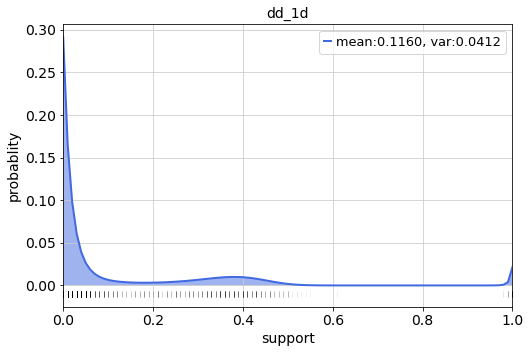

estimated Nr: 25.0
-------------------------------------------------------------------------
LDHB
Average counts per cell = 2.5530366304736907


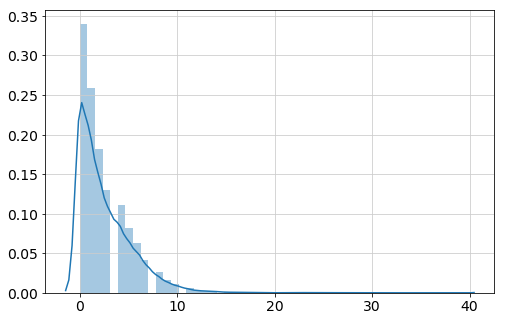

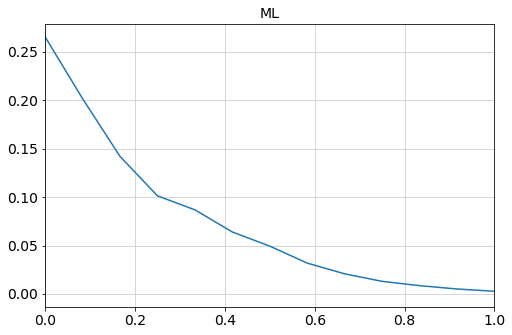

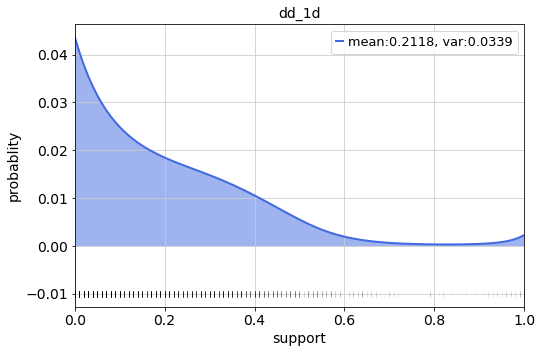

estimated Nr: 12.0
-------------------------------------------------------------------------
IL7R
Average counts per cell = 1.2459133754921847


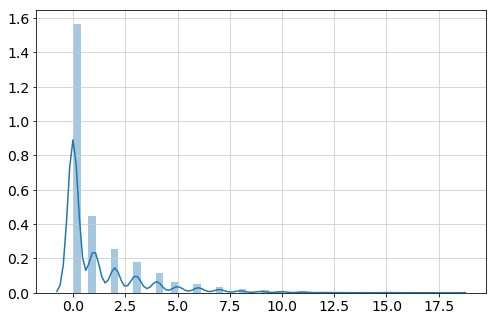

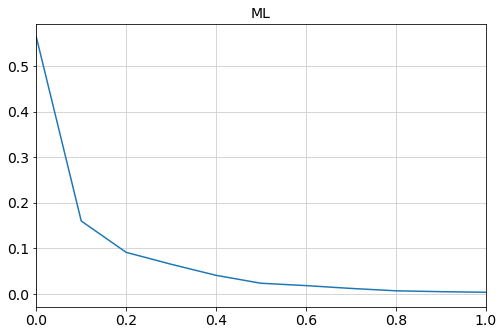

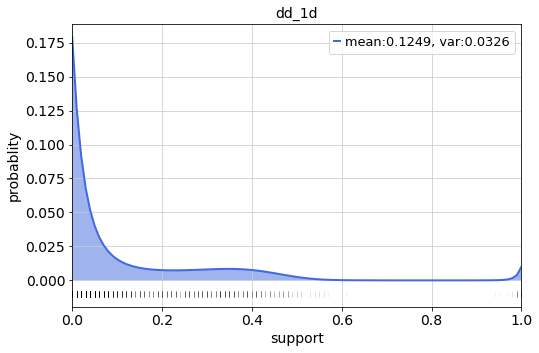

estimated Nr: 10.0
-------------------------------------------------------------------------
LST1
Average counts per cell = 2.914568667223482


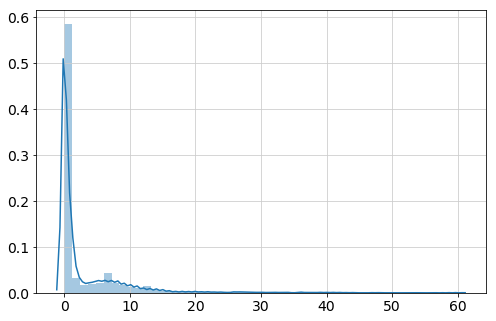

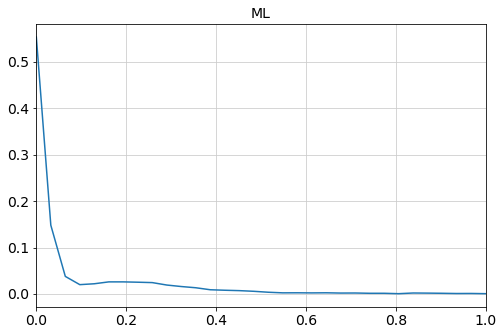

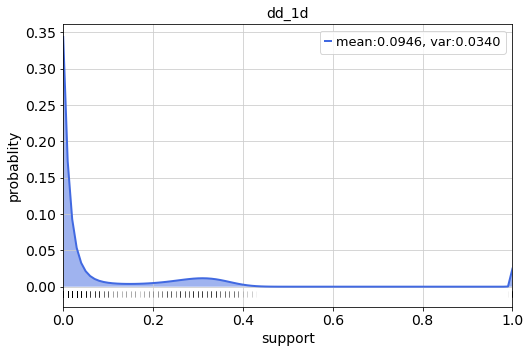

estimated Nr: 31.0
-------------------------------------------------------------------------
PF4
Average counts per cell = 0.09402219305572128


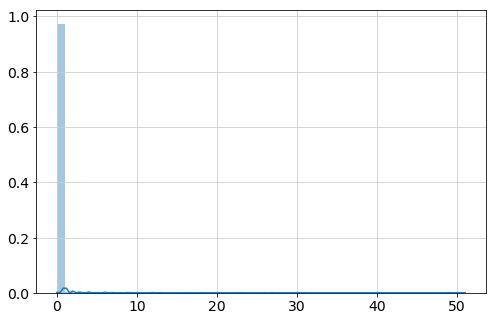

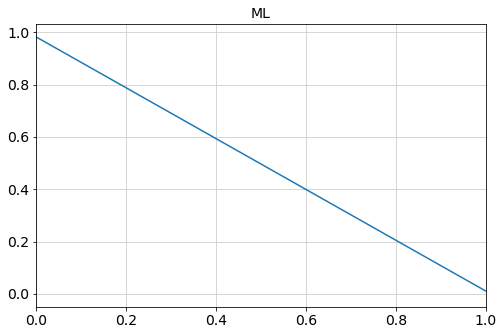

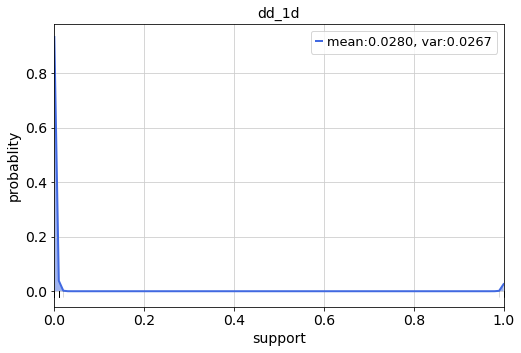

estimated Nr: 1.0
-------------------------------------------------------------------------
NKG7
Average counts per cell = 2.4571053573559243


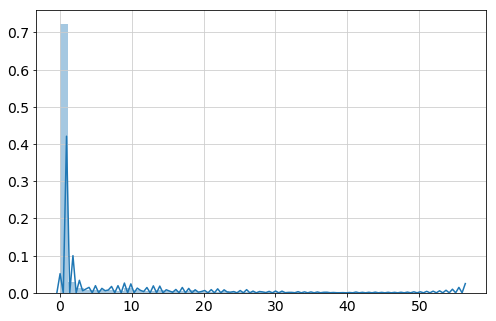

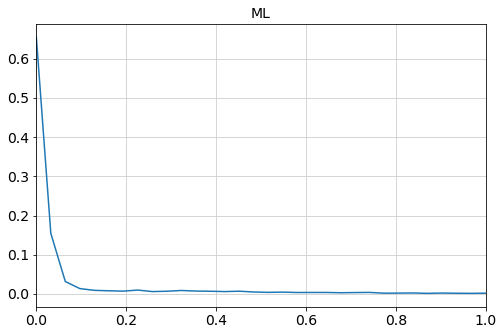

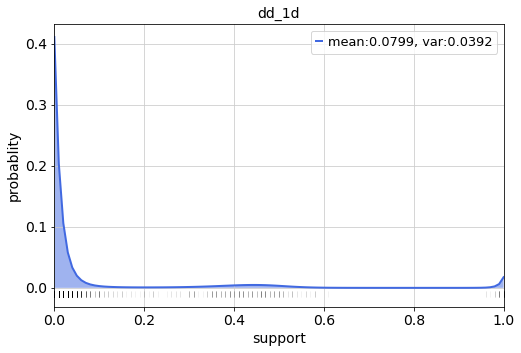

estimated Nr: 31.0
-------------------------------------------------------------------------
CST3
Average counts per cell = 7.001789762558167


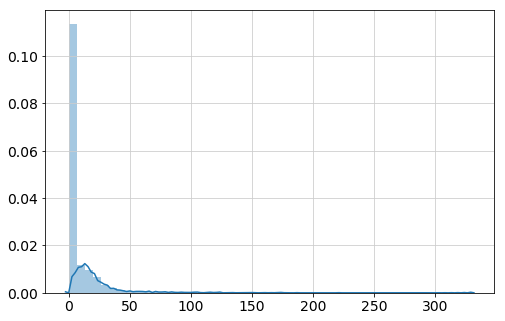

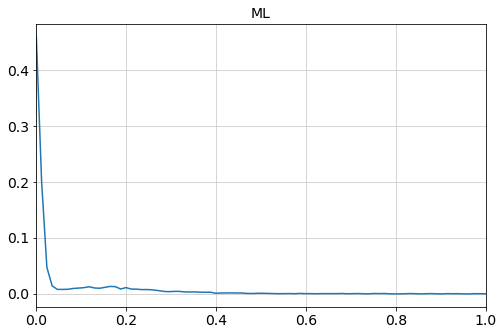

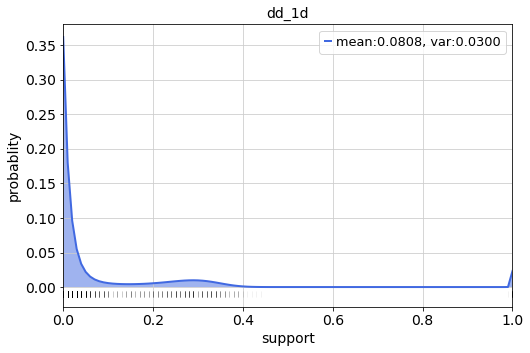

estimated Nr: 85.20000000000073
-------------------------------------------------------------------------
CCR7
Average counts per cell = 0.4827586206896552


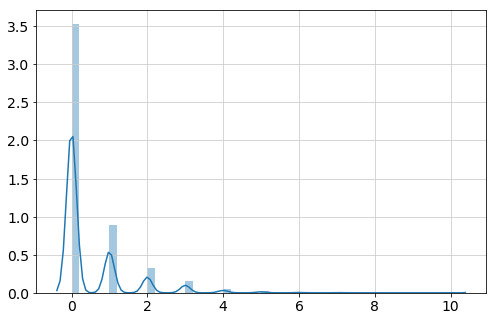

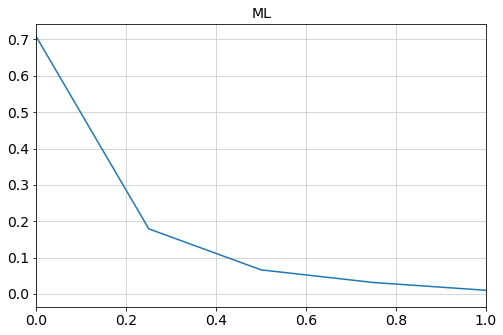

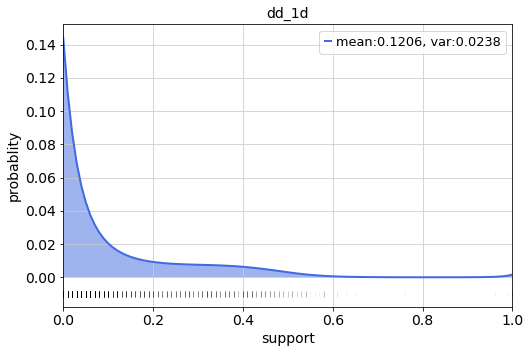

estimated Nr: 4.0
-------------------------------------------------------------------------


In [246]:
for gene in genes:
    Y=np.array(adata[:,gene].X,dtype=int)
    print(gene)
    print("Average counts per cell =",np.sum(Y)/len(Y))
    plt.figure(figsize=[8,5])
    sns.distplot(Y)
    plt.show()
    plt.figure(figsize=[8,5])
    p_hat_ml,ml_info=ml_1d(Y)
    plt.plot(ml_info['x'],p_hat_ml)
    plt.xlim([0,1])
    plt.title('ML')

    p_hat,dd_info=dd_1d(Y,noise='poi',vis=1,N_r=None)
    print("estimated Nr:",dd_info['N_r'])
    print("-------------------------------------------------------------------------")

In [217]:
def plot_density_1d(p,x):
    M1,M2 = moments(p,x)
    plt.figure(figsize=[8,5])
    plt.plot(x,p,marker='.',lw=2,markersize=0,color="royalblue",label='mean:%s, var:%s'%(str(M1)[0:6],str(M2-M1**2)[0:6]))
    plt.fill_between(x, p, facecolor='royalblue', alpha=0.5)
    plt.xlim([0,1])
    plt.ylim([0,1.05*np.max(p)])
    
    
#     plt.bar(x,p,label='mean:%s, var:%s'%(str(M1)[0:6],str(M2-M1**2)[0:6]))
    

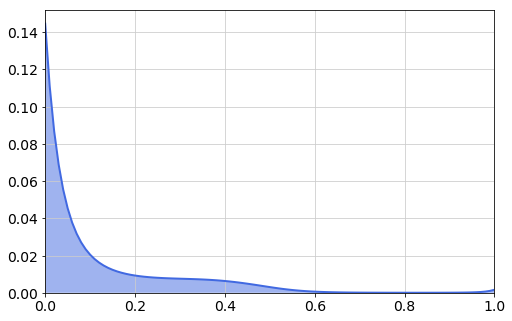

In [218]:
plot_density_1d(p_hat,dd_info['x'])